# 【自前AI講座】ニューラルネットワーク

---

## 演習問題の解答

Q1. ワインデータセットについて，以下を参照して，目的変数であるワインの等級を予測してみましょう．

- データ分割は train_test_split にて行い，学習用データは全データの 90 %，データのシャッフルは True としてください（結果に再現性を持たせたい場合は，引数 random_state に任意の数を設定してください）
- データは，以下のコードにて読み込むことができます（データの説明はこちら：https://slash-z.com/matplotlib-first-step/）

```python
from sklearn.datasets import load_wine

df_x, df_y = load_wine(return_X_y=True, as_frame=True)
```

- scikit-learn を用いて分類問題における認識精度を確認するには，以下のようにして算出が可能です．

```python
from sklearn.metrics import accuracy_score

print(accuracy_score(y_true, y_pred))
```

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score
from sklearn import neural_network
from sklearn.model_selection import train_test_split

# データ読み込み
df_x, df_y = load_wine(return_X_y=True, as_frame=True)

# データ分割
x_train, x_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.1, shuffle=True, random_state=0, stratify=df_y
)

In [32]:
df_x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [33]:
df_y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int32

In [34]:
# 学習／推論
model = neural_network.MLPClassifier(solver="sgd", random_state=0)
model.fit(x_train, y_train)
pred = model.predict(df_x)

# 分類精度算出
print(accuracy_score(y_true=df_y, y_pred=pred))

0.33146067415730335


In [35]:
model = neural_network.MLPClassifier(solver="sgd", hidden_layer_sizes=(512, 256, 64), random_state=0)
model.fit(x_train, y_train)
pred = model.predict(df_x)
print(accuracy_score(y_true=df_y, y_pred=pred))

0.398876404494382


In [36]:
model = neural_network.MLPClassifier(solver="adam", random_state=0)
model.fit(x_train, y_train)
pred = model.predict(df_x)
print(accuracy_score(y_true=df_y, y_pred=pred))

0.9213483146067416


c:\Users\multi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Q2. カリフォルニア住宅価格データセットについて，以下の手順で住宅価格を予測してみましょう．
- 次のコードでデータ読み込み，学習用／検証用にデータを分割します．

```python
from sklearn.datasets import fetch_california_housing

df_x, df_y = fetch_california_housing(return_X_y=True, as_frame=True)
x_train, x_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.25, shuffle=True, random_state=0,
)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
```

- 学習用データ (x_train, y_train) のみを学習し，検証用データ x_test について住宅価格を予測しましょう．
- 上記で予測した住宅価格について，正解の値との絶対平均誤差を算出してみましょう．

以下のコードにて絶対平均誤差が算出できます．
ここで，y_true は正解データの y_test，y_pred には x_test に対するモデルの推論結果を代入してください．

```python
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_true, y_pred))
```

In [37]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_absolute_error

# データ読み込み／分割
df_x, df_y = fetch_california_housing(return_X_y=True, as_frame=True)
df_x = (df_x - df_x.min()) / (df_x.max() - df_x.min())
x_train, x_test, y_train, y_test = train_test_split(
    df_x, df_y, test_size=0.25, shuffle=True, random_state=0,
)

In [38]:
df_x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163
...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793


In [39]:
df_y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [42]:
model = neural_network.MLPRegressor(solver="sgd", random_state=0)
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(mean_absolute_error(y_true=y_test, y_pred=pred))

0.5163586152066993


c:\Users\multi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
model = neural_network.MLPRegressor(solver="adam", random_state=0)
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(mean_absolute_error(y_true=y_test, y_pred=pred))

0.4389179166459008


c:\Users\multi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Q3. カルフォルニア大学アーバイン校（UCI）が提供している，手書き数字のデータセット (API: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) について，何の数字かを認識してみましょう．データ読み込みは以下のコードを実行します．

```python
from sklearn.datasets import load_digits

# データ読み込み
x, y = load_digits(return_X_y=True)
```

In [43]:
from sklearn.datasets import load_digits

# データ読み込み
x, y = load_digits(return_X_y=True)
print(x.shape, y.shape)

(1797, 64) (1797,)


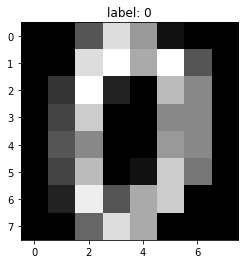

In [44]:
import matplotlib.pyplot as plt

plt.imshow(x[0].reshape((8,8)), cmap="gray")
plt.title(f"label: {y[0]}")
plt.show()

In [45]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, shuffle=True, random_state=0, stratify=y
)

model = neural_network.MLPClassifier(solver="sgd", random_state=0)
model.fit(x_train, y_train)
pred = model.predict(x)
print(accuracy_score(y_true=y, y_pred=pred))

0.9955481357818586


c:\Users\multi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
